##**Importing the Requisite Libraries**

In [ ]:
import csv
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Analysis of the Train Datasets**

###**Loading the Train Datasets**

In [ ]:
train_ben= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Beneficiarydata.csv')
train_inpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Inpatientdata.csv')
train_outpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Outpatientdata.csv')
train_y= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')

In [ ]:
train_ben.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [ ]:
train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
train_inpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_inpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
train_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
print("Shape of Train Beneficiary file Data:",train_ben.shape)
print("Shape of Train In-patient file Data:", train_inpat.shape)
print("Shape of Train Out-patient file Data:", train_outpat.shape)
print("Shape of Train file Data:", train_y.shape)

Shape of Train Beneficiary file Data: (138556, 25)
Shape of Train In-patient file Data: (40474, 30)
Shape of Train Out-patient file Data: (517737, 27)
Shape of Train file Data: (5410, 2)


In [ ]:
out_prov= np.unique(train_outpat['Provider'])
print("The number of Unique Providers in the Train_Outpat file:", len(out_prov))

in_prov= np.unique(train_inpat['Provider'])
print("The number of Unique Providers in the Train_Inpat file", len(in_prov))

com_prov= set(out_prov).intersection(set(in_prov))
print("The number of Providers common to both the Inpat and Outpat files:",len(com_prov))

uni_ele= len(out_prov)+len(in_prov)-len(com_prov)
print("Total Number of Unique Providers in Outpatient and Inpatient datasets Together:",uni_ele)

The number of Unique Providers in the Train_Outpat file: 5012
The number of Unique Providers in the Train_Inpat file 2092
The number of Providers common to both the Inpat and Outpat files: 1694
Total Number of Unique Providers in Outpatient and Inpatient datasets Together: 5410


##**Observations on the Train Datasets**

1. We observed that the labels of Potential Fraud as "Yes" or "No" have been  provided to the each of the Providers in the dataset.

2. The number of Unique Providers in the Dataset is 5410 as can be seen in the  "Train" file.

3. Hence,checking for the unique Providers in the Inpatient and the Outpatient files.

4. From the below, we observed that that the total number of Providers are spread across the Inpatient and Outpatient Files.


##**Loading the Test Datasets**

In [ ]:
test_ben= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_Beneficiarydata.csv')
test_inpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_Inpatientdata.csv')
test_outpat= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_Outpatientdata.csv')
test_y= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test.csv')

In [ ]:
print("Shape of Train Beneficiary file Data:",test_ben.shape)
print("Shape of Train In-patient file Data:", test_inpat.shape)
print("Shape of Train Out-patient file Data:", test_outpat.shape)
print("Shape of Train file Data:", test_y.shape)

Shape of Train Beneficiary file Data: (63968, 25)
Shape of Train In-patient file Data: (9551, 30)
Shape of Train Out-patient file Data: (125841, 27)
Shape of Train file Data: (1353, 1)


In [ ]:
out_prov= np.unique(test_outpat['Provider'])
print("The number of Unique Providers in the Train_Outpat file:", len(out_prov))

in_prov= np.unique(test_inpat['Provider'])
print("The number of Unique Providers in the Train_Inpat file", len(in_prov))

com_prov= set(out_prov).intersection(set(in_prov))
print("The number of Providers common to both the Inpat and Outpat files:",len(com_prov))

uni_ele= len(out_prov)+len(in_prov)-len(com_prov)
print("Total Number of Unique Providers in Outpatient and Inpatient datasets Together:",uni_ele)

The number of Unique Providers in the Train_Outpat file: 1259
The number of Unique Providers in the Train_Inpat file 520
The number of Providers common to both the Inpat and Outpat files: 426
Total Number of Unique Providers in Outpatient and Inpatient datasets Together: 1353


**Looking at the Class Distribution in the Train and Test Datasets**

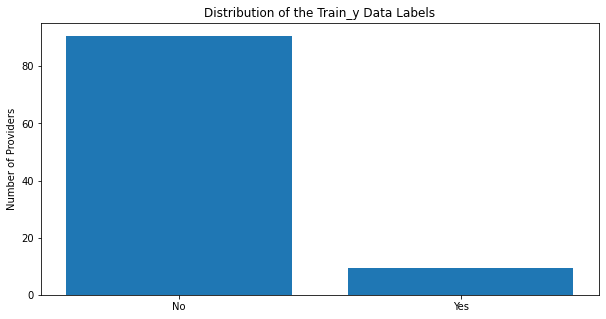

In [ ]:
tr_no_per= np.round((train_y["PotentialFraud"].value_counts()[0])/(train_y["PotentialFraud"].value_counts()[0]+train_y["PotentialFraud"].value_counts()[1]),3)*100

tr_yes_per= np.round((train_y["PotentialFraud"].value_counts()[1])/(train_y["PotentialFraud"].value_counts()[0]+train_y["PotentialFraud"].value_counts()[1]),3)*100

plt.figure(figsize=(10,5))
plt.bar(["No","Yes"],[tr_no_per,tr_yes_per])
plt.ylabel("Number of Providers")
plt.title("Distribution of the Train_y Data Labels")
plt.show()

In [ ]:
print(train_y["PotentialFraud"].value_counts())
print("=="*50)
print("Percenatage of NO points in Train dataset:",tr_no_per,'%')
print("Percenatage of YES points in Train dataset:",tr_yes_per,'%')

No     4904
Yes     506
Name: PotentialFraud, dtype: int64
Percenatage of NO points in Train dataset: 90.60000000000001 %
Percenatage of YES points in Train dataset: 9.4 %


In [ ]:
test_y.shape

(1353, 1)

In [ ]:
te_no_per= np.round((test_y["PotentialFraud"].value_counts()[0])/(test_y["PotentialFraud"].value_counts()[0]+test_y["PotentialFraud"].value_counts()[1]),3)

te_yes_per= np.round((test_y["PotentialFraud"].value_counts()[1])/(test_y["PotentialFraud"].value_counts()[0]+test_y["PotentialFraud"].value_counts()[1]),3)

plt.bar(["No","Yes"],[te_no_per,te_yes_per])

plt.ylabel("Number of Providers")
plt.title("Distribution of the Test_y Data Labels")

plt.show()

KeyError: ignored

In [ ]:
train_inpat['class']= np.zeros(len(train_inpat["Provider"]))

In [ ]:
train_y['Provider'][9]

'PRV51014'

In [ ]:
np.where(train_inpat['Provider']== 'PRV51014')

(array([], dtype=int64),)

In [ ]:
for p in range(len(train_y['Provider'])):
    train_inpat['class'][p]= np.where(train_inpat["Provider"]== train_y['Provider'][p],train_y['PotentialFraud'][p],'NAN')

print(train_inpat.head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


ValueError: ignored

**Mapping the Class of each of the Providers with the Providers in the Inpatient Data**

In [ ]:
for p1 in tqdm(range(len(train_inpat["Provider"]))):
    for p2 in range(len(train_y["Provider"])):
        if train_inpat["Provider"][p1]== train_y["Provider"][p2]:
            train_inpat["class"][p1]= train_y["PotentialFraud"][p2]

  0%|          | 0/40474 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 40474/40474 [50:30<00:00, 13.36it/s]


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_inpatient_new.pkl','wb') as inp_new:
    pickle.dump(train_inpat,inp_new)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_inpatient_new.pkl','rb') as inp_new:
    tr_inpat_new= pickle.load(inp_new)

In [ ]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
tr_inpat_new.shape

(40474, 31)

In [ ]:
tr_inp_fin= pd.merge(train_inpat,train_y,how='outer',on= 'Provider')
tr_inp_fin.shape

(43792, 32)

In [ ]:
tr_inp_fin.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,class,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000.0,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000.0,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000.0,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000.0,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000.0,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes,Yes


**Checking for the percentage of nan values in each of the columns in the Inpatient Data**

In [ ]:
na_perc= ((tr_inpat_new.isna().sum())/tr_inpat_new.shape[0])*100
na_perc.to_frame()
print(type(na_perc))
print(na_perc)

<class 'pandas.core.series.Series'>
BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
Cl

**Dropping the Columns which have more than 80% of the nan values in the Inpatient Data**

In [ ]:
tr_inpat_new.drop(['OtherPhysician','ClmDiagnosisCode_10','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace= True)

In [ ]:
((tr_inpat_new.isna().sum())/(tr_inpat_new.isna().shape[0]))*100

BeneID                     0.000000
ClaimID                    0.000000
ClaimStartDt               0.000000
ClaimEndDt                 0.000000
Provider                   0.000000
InscClaimAmtReimbursed     0.000000
AttendingPhysician         0.276721
OperatingPhysician        41.122696
AdmissionDt                0.000000
ClmAdmitDiagnosisCode      0.000000
DeductibleAmtPaid          2.221179
DischargeDt                0.000000
DiagnosisGroupCode         0.000000
ClmDiagnosisCode_1         0.000000
ClmDiagnosisCode_2         0.558383
ClmDiagnosisCode_3         1.670208
ClmDiagnosisCode_4         3.790087
ClmDiagnosisCode_5         7.150269
ClmDiagnosisCode_6        11.953353
ClmDiagnosisCode_7        17.932500
ClmDiagnosisCode_8        24.563918
ClmDiagnosisCode_9        33.347334
ClmProcedureCode_1        42.807728
class                      0.000000
dtype: float64

**Using SimpleImputer to impute the missing values by leveraging the "Most Frequent" strategy in the Categorical Columns**

In [ ]:
imp_cat= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

In [ ]:
tr_inpat_new["ClmDiagnosisCode_2"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_2"].values.reshape(-1,1))[:,0]
tr_inpat_new["ClmDiagnosisCode_3"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_3"].values.reshape(-1,1))[:,0]
tr_inpat_new["ClmDiagnosisCode_4"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_4"].values.reshape(-1,1))[:,0]
tr_inpat_new["ClmDiagnosisCode_5"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_5"].values.reshape(-1,1))[:,0]
tr_inpat_new["ClmDiagnosisCode_6"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_6"].values.reshape(-1,1))[:,0]
tr_inpat_new["ClmDiagnosisCode_7"]= imp_cat.fit_transform(tr_inpat_new["ClmDiagnosisCode_7"].values.reshape(-1,1))[:,0]
tr_inpat_new["AttendingPhysician"]= imp_cat.fit_transform(tr_inpat_new["AttendingPhysician"].values.reshape(-1,1))[:,0]

In [ ]:
((tr_inpat_new.isna().sum())/(tr_inpat_new.shape[0]))*100

BeneID                     0.000000
ClaimID                    0.000000
ClaimStartDt               0.000000
ClaimEndDt                 0.000000
Provider                   0.000000
InscClaimAmtReimbursed     0.000000
AttendingPhysician         0.000000
OperatingPhysician        41.122696
AdmissionDt                0.000000
ClmAdmitDiagnosisCode      0.000000
DeductibleAmtPaid          2.221179
DischargeDt                0.000000
DiagnosisGroupCode         0.000000
ClmDiagnosisCode_1         0.000000
ClmDiagnosisCode_2         0.000000
ClmDiagnosisCode_3         0.000000
ClmDiagnosisCode_4         0.000000
ClmDiagnosisCode_5         0.000000
ClmDiagnosisCode_6         0.000000
ClmDiagnosisCode_7         0.000000
ClmDiagnosisCode_8        24.563918
ClmDiagnosisCode_9        33.347334
ClmProcedureCode_1        42.807728
class                      0.000000
dtype: float64

In [ ]:
tr_inpat_new["OperatingPhysician"]= tr_inpat_new["OperatingPhysician"].fillna('missing')
tr_inpat_new["ClmDiagnosisCode_8"]= tr_inpat_new["ClmDiagnosisCode_8"].fillna('missing')
tr_inpat_new["ClmDiagnosisCode_9"]= tr_inpat_new["ClmDiagnosisCode_9"].fillna('missing')
tr_inpat_new["ClmProcedureCode_1"]= tr_inpat_new["ClmProcedureCode_1"].fillna('missing')

**Using SimpleImputer to impute the missing values by leveraging the "Mean" strategy in the Numerical Columns**

In [ ]:
imp_num= SimpleImputer(missing_values= np.nan, strategy= 'mean' )
tr_inpat_new['DeductibleAmtPaid']= imp_num.fit_transform(tr_inpat_new['DeductibleAmtPaid'].values.reshape(-1,1))[:,0]

In [ ]:
((tr_inpat_new.isna().sum())/(tr_inpat_new.shape[0]))*100

BeneID                    0.0
ClaimID                   0.0
ClaimStartDt              0.0
ClaimEndDt                0.0
Provider                  0.0
InscClaimAmtReimbursed    0.0
AttendingPhysician        0.0
OperatingPhysician        0.0
AdmissionDt               0.0
ClmAdmitDiagnosisCode     0.0
DeductibleAmtPaid         0.0
DischargeDt               0.0
DiagnosisGroupCode        0.0
ClmDiagnosisCode_1        0.0
ClmDiagnosisCode_2        0.0
ClmDiagnosisCode_3        0.0
ClmDiagnosisCode_4        0.0
ClmDiagnosisCode_5        0.0
ClmDiagnosisCode_6        0.0
ClmDiagnosisCode_7        0.0
ClmDiagnosisCode_8        0.0
ClmDiagnosisCode_9        0.0
ClmProcedureCode_1        0.0
class                     0.0
dtype: float64

##Univariate Analysis of the Inpatient Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


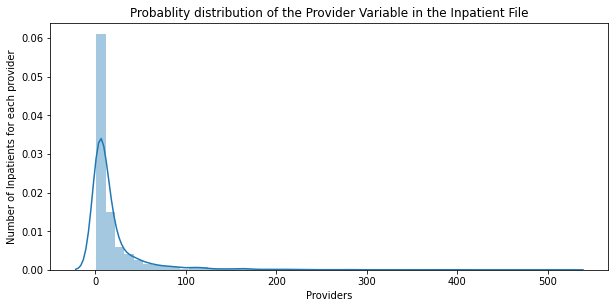

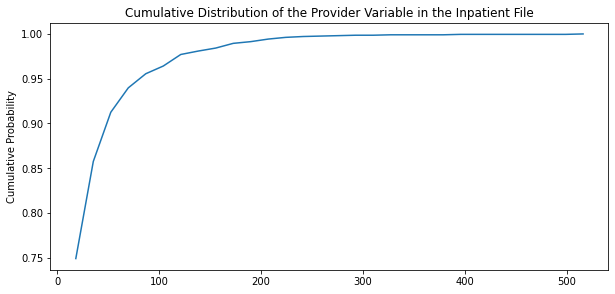

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['Provider'].value_counts())
plt.xlabel("Providers")
plt.ylabel("Number of Inpatients for each provider")
plt.title("Probablity distribution of the Provider Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['Provider'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Provider Variable in the Inpatient File')
plt.show()

We see from the Cumulative distribution function that about 95% of the providers have 75 or fewer occurences of claims in the Inpatient Data while the most number of claims i.e. 100 and above occurences have been tagged to 5% or less number of Provider IDs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


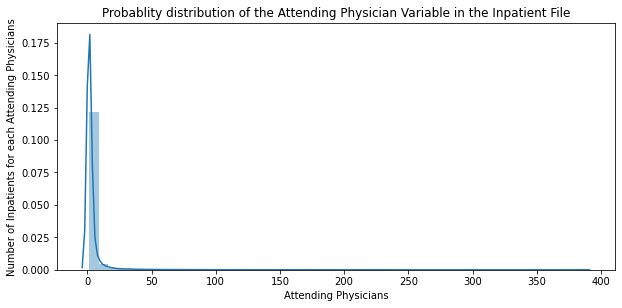

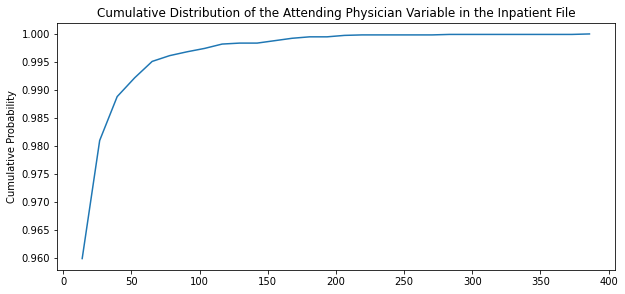

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['AttendingPhysician'].value_counts())
plt.xlabel("Attending Physicians")
plt.ylabel("Number of Inpatients for each Attending Physicians")
plt.title("Probablity distribution of the Attending Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['AttendingPhysician'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Attending Physician Variable in the Inpatient File')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['OperatingPhysician'].value_counts())
plt.xlabel("Operating Physicians")
plt.ylabel("Number of Inpatients for each Operating Physicians")
plt.title("Probablity distribution of the Operating Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['OperatingPhysician'].value_counts(),bins=10)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Operating Physician Variable in the Inpatient File')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


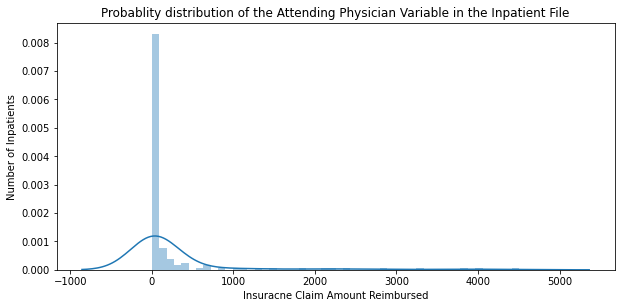

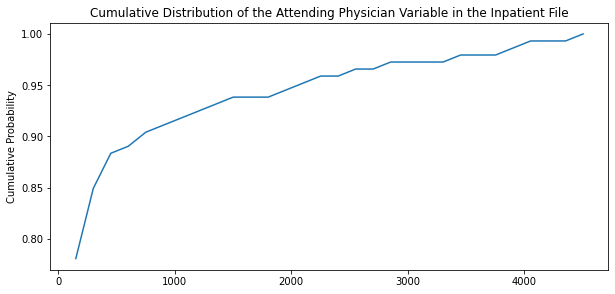

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.distplot(tr_inpat_new['InscClaimAmtReimbursed'].value_counts())
plt.xlabel("Insuracne Claim Amount Reimbursed")
plt.ylabel("Number of Inpatients")
plt.title("Probablity distribution of the Attending Physician Variable in the Inpatient File")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
counts,bin_edges= np.histogram(tr_inpat_new['InscClaimAmtReimbursed'].value_counts(),bins=30)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of the Attending Physician Variable in the Inpatient File')
plt.show()

**Checking for the Number of Unique values in the Deductible Amount Column.**

In [ ]:
len(np.unique(np.array(tr_inpat_new['DeductibleAmtPaid'])))

1

There is just the one value across all the rows in the Inpatient dataset, hence dropping the column completely as the column is not adding any variance to the classification of the dependent variable.

In [ ]:
tr_inpat_new.drop(['DeductibleAmtPaid'], axis=1, inplace= True)

In [ ]:
tr_inpat_new.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,class
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,missing,2009-04-12,7866,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,missing,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,missing,missing,7092,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,missing,2009-09-17,29590,2009-09-20,883,29623,30390,71690,34590,V1581,32723,4019,missing,missing,missing,No


In [ ]:
tr_inpat_new['DischargeDt']= pd.to_datetime(tr_inpat_new['DischargeDt'])
tr_inpat_new['AdmissionDt']= pd.to_datetime(tr_inpat_new['AdmissionDt'])
tr_inpat_new['ClaimStartDt']= pd.to_datetime(tr_inpat_new['ClaimStartDt'])
tr_inpat_new['ClaimEndDt']= pd.to_datetime(tr_inpat_new['ClaimEndDt'])

In [ ]:
tr_inpat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40474 non-null  object        
 7   OperatingPhysician      40474 non-null  object        
 8   AdmissionDt             40474 non-null  datetime64[ns]
 9   ClmAdmitDiagnosisCode   40474 non-null  object        
 10  DischargeDt             40474 non-null  datetime64[ns]
 11  DiagnosisGroupCode      40474 non-null  object        
 12  ClmDiagnosisCode_1      40474 non-null  object

In [ ]:
tr_inpat_new["days_admission"]= tr_inpat_new['DischargeDt']-tr_inpat_new['AdmissionDt']
tr_inpat_new["days_of_claim"]= tr_inpat_new['ClaimEndDt']-tr_inpat_new['ClaimStartDt']

In [ ]:
tr_inpat_new["days_admission"]= tr_inpat_new["days_admission"].dt.days
tr_inpat_new["days_of_claim"]= tr_inpat_new["days_of_claim"].dt.days

In [ ]:
tr_inpat_new.drop(['DischargeDt','AdmissionDt','ClaimEndDt','ClaimStartDt'], axis=1, inplace= True)

In [ ]:
tr_inpat_new.head(3)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,class,days_admission,days_of_claim
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,missing,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,missing,Yes,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,6186,750,6186,2948,56400,4019,4019,4019,4019,missing,missing,7092,No,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,missing,29590,883,29623,30390,71690,34590,V1581,32723,4019,missing,missing,missing,No,3,3


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tr_inp_new.pkl', 'wb') as inp_new:
    pickle.dump(tr_inpat_new,inp_new)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tr_inp_new.pkl', 'rb') as inp_new:
    tr_inp_new= pickle.load(inp_new)

##**Analysis of the Outpatient Dataset**

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [ ]:
train_outpat.drop(['OperatingPhysician','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','ClmAdmitDiagnosisCode'], axis=1, inplace= True)

In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                     0.000000
ClaimID                    0.000000
ClaimStartDt               0.000000
ClaimEndDt                 0.000000
Provider                   0.000000
InscClaimAmtReimbursed     0.000000
AttendingPhysician         0.269635
OtherPhysician            62.327205
ClmDiagnosisCode_1         2.018979
ClmDiagnosisCode_2        37.737307
ClmDiagnosisCode_3        60.741264
DeductibleAmtPaid          0.000000
dtype: float64

In [ ]:
train_outpat["AttendingPhysician"]= imp_cat.fit_transform(train_outpat["AttendingPhysician"].values.reshape(-1,1))[:,0]
train_outpat["ClmDiagnosisCode_1"]= imp_cat.fit_transform(train_outpat["ClmDiagnosisCode_1"].values.reshape(-1,1))[:,0]

In [ ]:
train_outpat["OtherPhysician"]= train_outpat["OtherPhysician"].fillna("missing")
train_outpat["ClmDiagnosisCode_2"]= train_outpat["ClmDiagnosisCode_2"].fillna("missing")
train_outpat["ClmDiagnosisCode_3"]= train_outpat["ClmDiagnosisCode_3"].fillna("missing")

In [ ]:
((train_outpat.isna().sum())/(train_outpat.shape[0]))*100

BeneID                    0.0
ClaimID                   0.0
ClaimStartDt              0.0
ClaimEndDt                0.0
Provider                  0.0
InscClaimAmtReimbursed    0.0
AttendingPhysician        0.0
OtherPhysician            0.0
ClmDiagnosisCode_1        0.0
ClmDiagnosisCode_2        0.0
ClmDiagnosisCode_3        0.0
DeductibleAmtPaid         0.0
dtype: float64

In [ ]:
train_outpat['ClaimStartDt']= pd.to_datetime(train_outpat['ClaimStartDt'])
train_outpat['ClaimEndDt']= pd.to_datetime(train_outpat['ClaimEndDt'])

In [ ]:
train_outpat["days_of_claim"]= train_outpat['ClaimEndDt']-train_outpat['ClaimStartDt']
train_outpat["days_of_claim"]= train_outpat["days_of_claim"].dt.days

In [ ]:
train_outpat.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

In [ ]:
train_outpat.head(3)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,DeductibleAmtPaid,days_of_claim
0,BENE11002,CLM624349,PRV56011,30,PHY326117,missing,78943,V5866,V1272,0,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,missing,6115,missing,missing,0,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,missing,2723,missing,missing,0,0


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'wb') as tr_out:
    pickle.dump(train_outpat,tr_out)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'rb') as tr_out:
    train_outpat= pickle.load(tr_out)

##**Analysis of the Beneficary Dataset**

In [ ]:
train_ben.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


In [ ]:
((train_ben.isna().sum())/(train_ben.shape[0]))*100

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [ ]:
train_ben.drop(['DOD'], axis=1, inplace= True)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_ben.pkl','wb') as tr_ben:
    pickle.dump(train_ben,tr_ben)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/train_outpat.pkl', 'rb') as tr_ben:
    train_ben= pickle.load(tr_ben)

In [ ]:
train_ben['NoOfMonths_PartACov'].equals(train_ben['NoOfMonths_PartBCov'])

False

In [ ]:
y= pd.DatetimeIndex(train_ben['DOB']).month

In [ ]:
y[:5]

Int64Index([1, 9, 8, 7, 9], dtype='int64', name='DOB')

In [ ]:
clm_dia_cod1= set(train_inpat["ClmDiagnosisCode_1"]).intersection(set(train_outpat["ClmDiagnosisCode_1"]))
print(len(clm_dia_cod1))

2158


In [ ]:
train_inpat["ClmDiagnosisCode_1"].isna().sum()

0

In [ ]:
print("Shape of the Inpatient Dataset post Imputation: ", tr_inpat_new.shape)
print("Shape of the Outpatient Dataset post Imputation: ", train_outpat.shape)
print("Shape of the Beneficiary Dataset post Imputation: ", train_ben.shape)

Shape of the Inpatient Dataset post Imputation:  (40474, 21)
Shape of the Outpatient Dataset post Imputation:  (517737, 11)
Shape of the Beneficiary Dataset post Imputation:  (138556, 24)


In [ ]:
ClaimID
BeneID

In [ ]:
claimids= set(train_inpat["ClaimID"]).intersection(set(train_outpat["ClaimID"]))
print("No.of Common Claim IDs between Inpatient and Outpatient Datasets: ",len(claimids))

benids1= set(train_inpat["BeneID"]).intersection(set(train_outpat["BeneID"]))
print("No.of Common Beneficiary IDs between Inpatient and Outpatient Datasets: ",len(benids1))

benids2= set(train_inpat["BeneID"]).intersection(set(train_ben["BeneID"]))
print("No.of Common Beneficiary IDs between inpatient and Beneficiary Datasets: ",len(benids2))

benids3= set(train_outpat["BeneID"]).intersection(set(train_ben["BeneID"]))
print("Np.of Common Beneficiary IDs between Outpatient and Beneficiary Datasets: ",len(benids3))

No.of Common Claim IDs between Inpatient and Outpatient Datasets:  0
No.of Common Beneficiary IDs between Inpatient and Outpatient Datasets:  26713
No.of Common Beneficiary IDs between inpatient and Beneficiary Datasets:  31289
Np.of Common Beneficiary IDs between Outpatient and Beneficiary Datasets:  133980


##**Merging the Inpatient, Outpatient and Beneficiary Dataframes**

In [ ]:
df_in_out= pd.merge(train_outpat, tr_inpat_new, how='outer', left_on= ["ClaimID"], right_on=["ClaimID"])
print(df_in_out.shape)

(558211, 31)


In [ ]:
df_in_out.columns

Index(['BeneID_x', 'ClaimID', 'Provider_x', 'InscClaimAmtReimbursed_x',
       'AttendingPhysician_x', 'OtherPhysician', 'ClmDiagnosisCode_1_x',
       'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'DeductibleAmtPaid',
       'days_of_claim_x', 'BeneID_y', 'Provider_y', 'InscClaimAmtReimbursed_y',
       'AttendingPhysician_y', 'OperatingPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y',
       'ClmDiagnosisCode_3_y', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'class', 'days_admission',
       'days_of_claim_y'],
      dtype='object')

In [ ]:
df_final= pd.merge(df_in_out,train_ben, how='outer',left_on= 'BeneID', right_on='BeneID')
print(df_final.shape)

KeyError: ignored